In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder

from imblearn.over_sampling import SMOTE, RandomOverSampler

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/HR%20Analytics-%20Employee%20Promotion%20Data/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/HR%20Analytics-%20Employee%20Promotion%20Data/test.csv")

In [3]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [4]:
data["awards_won?"].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

In [5]:
data.loc[data['awards_won?']==1]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,58,1
122,38052,Procurement,region_34,Master's & above,m,sourcing,1,37,5.0,3,1,92,1
138,51164,Technology,region_14,Bachelor's,f,other,1,31,4.0,4,1,78,0
140,7606,Technology,region_29,Bachelor's,f,other,2,30,3.0,7,1,76,0
200,53630,Sales & Marketing,region_23,Master's & above,f,sourcing,1,34,4.0,5,1,94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54641,2467,Sales & Marketing,region_27,Bachelor's,m,other,1,42,2.0,4,1,47,0
54702,4952,Operations,region_28,Bachelor's,m,other,1,28,3.0,2,1,62,0
54772,34501,Operations,region_27,Master's & above,m,other,1,37,5.0,2,1,57,0
54797,62450,Sales & Marketing,region_11,Bachelor's,m,sourcing,1,28,5.0,3,1,47,0


In [6]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [8]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
data["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [11]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [12]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col, data[col].unique())

department ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender ['f' 'm']
recruitment_channel ['sourcing' 'other' 'referred']


<AxesSubplot:>

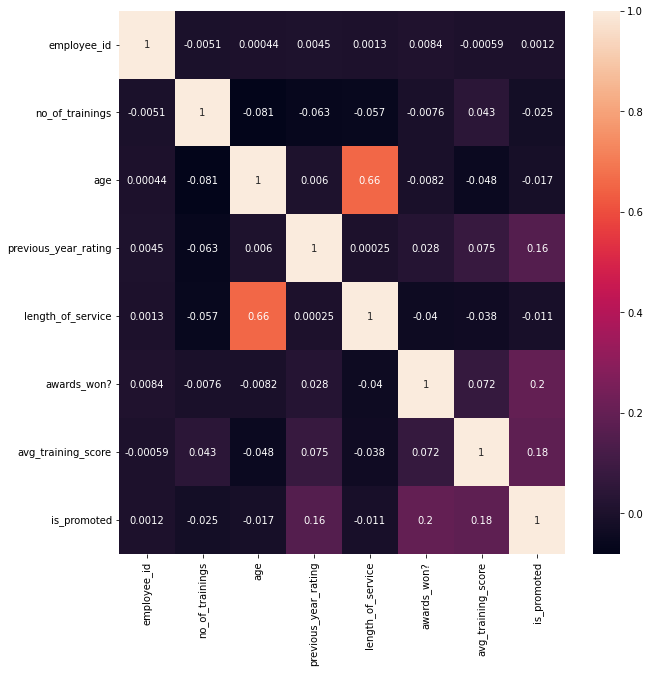

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [16]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col, data[col].unique())

department ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender ['f' 'm']
recruitment_channel ['sourcing' 'other' 'referred']


,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
40128,-1.482549,0.660306,-1.126642,-0.416991,0.987811,-0.269572,1.349553,-0.155185,0.112260,-0.322283,-0.220843,-0.21463,-0.135936,1.902914,-0.397517,-0.136048,-0.645989,-0.389557
9733,-1.482549,0.660306,0.755903,2.904309,0.057166,1.319450,0.638359,-0.155185,-0.945288,-0.322283,-0.220843,-0.21463,-0.135936,-0.525510,-0.397517,-0.136048,1.548015,-0.389557
2237,0.618232,0.660306,0.755903,-0.416991,-0.341682,-0.269572,0.164230,-0.155185,0.641034,-0.322283,-0.220843,-0.21463,-0.135936,-0.525510,2.515614,-0.136048,-0.645989,-0.389557
45772,0.618232,-1.514450,0.755903,-0.416991,1.519608,-1.064083,-0.309899,-0.155185,-0.869749,-0.322283,-0.220843,-0.21463,-0.135936,-0.525510,-0.397517,-0.136048,1.548015,-0.389557
15796,0.618232,0.660306,-1.126642,-0.416991,1.120760,1.319450,1.112488,-0.155185,-1.171905,-0.322283,-0.220843,-0.21463,-0.135936,-0.525510,-0.397517,-0.136048,1.548015,-0.389557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28495,0.618232,-1.514450,0.755903,-0.416991,-0.740530,1.319450,-0.309899,-0.155185,2.453973,-0.322283,-0.220843,-0.21463,-0.135936,1.902914,-0.397517,-0.136048,-0.645989,-0.389557
20815,0.618232,0.660306,-1.126642,1.243659,-1.139378,-0.269572,-0.309899,-0.155185,-0.869749,-0.322283,-0.220843,-0.21463,-0.135936,1.902914,-0.397517,-0.136048,-0.645989,-0.389557
45946,0.618232,0.660306,-1.126642,1.243659,-0.474632,0.524939,-0.309899,-0.155185,-1.398523,-0.322283,-0.220843,-0.21463,-0.135936,-0.525510,-0.397517,-0.136048,1.548015,-0.389557
22309,-1.482549,-1.514450,-1.126642,-0.416991,-0.208733,0.524939,-0.309899,-0.155185,-0.416514,-0.322283,-0.220843,-0.21463,-0.135936,1.902914,-0.397517,-0.136048,-0.645989,-0.389557


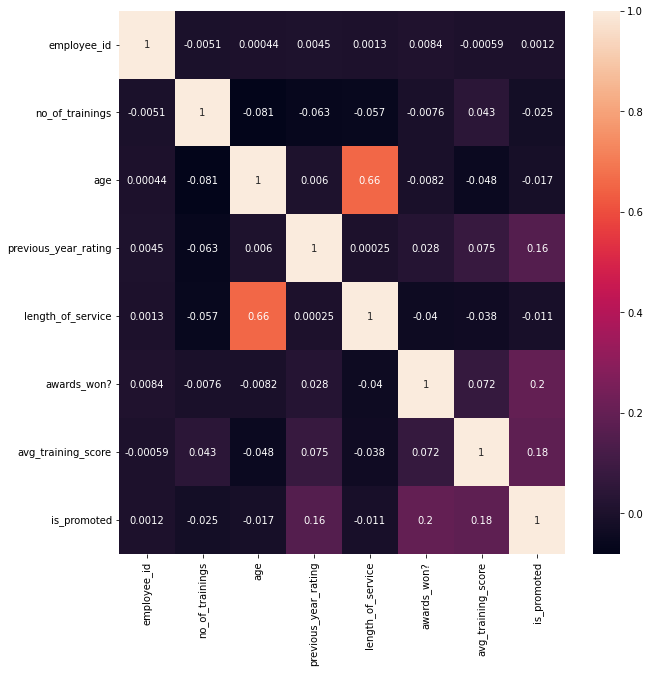

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

def preprocess_inputs(df):
    df = df.copy()
    df = df.drop(['region','employee_id'],axis=1)
    df = df.dropna(axis=0)
    
    df['gender'] = df['gender'].replace({'f':0, 'm':1})
    
    dummies = pd.get_dummies(df['department'])
    df = pd.concat([df,dummies],axis=1)
    df = df.drop('department',axis=1)
    
    edu_ranking = {"Master's & above" : 1, "Bachelor's" : 2 , "Below Secondary" : 3}
    recruit_ranking = {'sourcing' : 1, 'other' : 2, 'referred' : 3}
    
    df['education'] = df['education'].map(edu_ranking)
    df['recruitment_channel'] = df['recruitment_channel'].map(recruit_ranking)
        
    
    y = df['is_promoted']
    X = df.drop('is_promoted',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle = True, random_state=43)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess_inputs(data)

X_train

In [18]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

X_train

,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
40128,-1.482549,0.660306,-1.126642,-0.416991,0.987811,-0.269572,1.349553,-0.155185,0.112260,-0.322283,-0.220843,-0.21463,-0.135936,1.902914,-0.397517,-0.136048,-0.645989,-0.389557
9733,-1.482549,0.660306,0.755903,2.904309,0.057166,1.319450,0.638359,-0.155185,-0.945288,-0.322283,-0.220843,-0.21463,-0.135936,-0.525510,-0.397517,-0.136048,1.548015,-0.389557
2237,0.618232,0.660306,0.755903,-0.416991,-0.341682,-0.269572,0.164230,-0.155185,0.641034,-0.322283,-0.220843,-0.21463,-0.135936,-0.525510,2.515614,-0.136048,-0.645989,-0.389557
45772,0.618232,-1.514450,0.755903,-0.416991,1.519608,-1.064083,-0.309899,-0.155185,-0.869749,-0.322283,-0.220843,-0.21463,-0.135936,-0.525510,-0.397517,-0.136048,1.548015,-0.389557
15796,0.618232,0.660306,-1.126642,-0.416991,1.120760,1.319450,1.112488,-0.155185,-1.171905,-0.322283,-0.220843,-0.21463,-0.135936,-0.525510,-0.397517,-0.136048,1.548015,-0.389557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28495,0.618232,-1.514450,0.755903,-0.416991,-0.740530,1.319450,-0.309899,-0.155185,2.453973,-0.322283,-0.220843,-0.21463,-0.135936,1.902914,-0.397517,-0.136048,-0.645989,-0.389557
20815,0.618232,0.660306,-1.126642,1.243659,-1.139378,-0.269572,-0.309899,-0.155185,-0.869749,-0.322283,-0.220843,-0.21463,-0.135936,1.902914,-0.397517,-0.136048,-0.645989,-0.389557
45946,0.618232,0.660306,-1.126642,1.243659,-0.474632,0.524939,-0.309899,-0.155185,-1.398523,-0.322283,-0.220843,-0.21463,-0.135936,-0.525510,-0.397517,-0.136048,1.548015,-0.389557
22309,-1.482549,-1.514450,-1.126642,-0.416991,-0.208733,0.524939,-0.309899,-0.155185,-0.416514,-0.322283,-0.220843,-0.21463,-0.135936,1.902914,-0.397517,-0.136048,-0.645989,-0.389557


In [19]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
inputs = tf.keras.Input(shape=(X_resampled.shape[1],))

x = tf.keras.layers.Dense(128, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 18)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2432      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33    

2022-05-07 16:44:58.465852: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [21]:
epochs=100
history = model.fit(
  X_resampled,
  y_resampled,
  validation_split=0.2,
  epochs=epochs,
    callbacks=[
           tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=3,
            restore_best_weights=True
            )
    ]
)

Epoch 1/100
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4626 - accuracy: 0.7733 - val_loss: 0.6587 - val_accuracy: 0.5196
Epoch 2/100
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4532 - accuracy: 0.7780 - val_loss: 0.6592 - val_accuracy: 0.5026
Epoch 3/100
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4451 - accuracy: 0.7784 - val_loss: 0.6663 - val_accuracy: 0.5227
Epoch 4/100
1556/1556 [==============================] - 5s 3ms/step - loss: 0.4368 - accuracy: 0.7817 - val_loss: 0.6076 - val_accuracy: 0.5669
Epoch 5/100
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4317 - accuracy: 0.7841 - val_loss: 0.6529 - val_accuracy: 0.5335
Epoch 6/100
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4259 - accuracy: 0.7845 - val_loss: 0.6243 - val_accuracy: 0.5170
Epoch 7/100
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4189 - accuracy: 0.7878 - val_loss: 0.6018 - val_ac

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'My test loss is {loss*100:.2f}% and test accuracy is {accuracy*100:.2f}%')

457/457 [==============================] - 1s 1ms/step - loss: 0.3582 - accuracy: 0.8667
My test loss is 35.82% and test accuracy is 86.67%


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
models = {
    '        Logistic Regression' : LogisticRegression(),
    '              Decision Tree' : DecisionTreeClassifier(),
    '              Random Forest' : RandomForestClassifier(),
    '             Neural Network' : MLPClassifier(),
    '                 K-Neighbors': KNeighborsClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    '          Bagging Classifier': BaggingClassifier(),
    '                  Linear SVM': LinearSVC(),
    '                  Kernel SVM': SVC()
    
}


for name, model in models.items():
    model = model.fit(X_resampled,y_resampled)
    print(name + " trained")

        Logistic Regression trained
              Decision Tree trained
              Random Forest trained


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


             Neural Network trained
                 K-Neighbors trained
Gradient Boosting Classifier trained
          Bagging Classifier trained


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


                  Linear SVM trained
                  Kernel SVM trained


In [25]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

        Logistic Regression: 75.09%
              Decision Tree: 87.52%
              Random Forest: 91.29%
             Neural Network: 77.83%
                 K-Neighbors: 77.78%
Gradient Boosting Classifier: 89.54%
          Bagging Classifier: 91.47%
                  Linear SVM: 75.85%
                  Kernel SVM: 79.22%


In [26]:
def preprocess_inputs_test(df):
    df = df.copy()
    df = df.drop(['region','employee_id'],axis=1)
    df = df.dropna(axis=0)
    
    df['gender'] = df['gender'].replace({'f':0, 'm':1})
    
    dummies = pd.get_dummies(df['department'])
    df = pd.concat([df,dummies],axis=1)
    df = df.drop('department',axis=1)
    
    edu_ranking = {"Master's & above" : 1, "Bachelor's" : 2 , "Below Secondary" : 3}
    recruit_ranking = {'sourcing' : 1, 'other' : 2, 'referred' : 3}
    
    df['education'] = df['education'].map(edu_ranking)
    df['recruitment_channel'] = df['recruitment_channel'].map(recruit_ranking)
        
        
    scaler = StandardScaler()
    scaler.fit(df)
    
    df = pd.DataFrame(scaler.transform(df), columns = df.columns, index = df.index)
    
    return df
X = preprocess_inputs_test(test)

X

,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
1,0.621236,-1.529572,0.761913,-0.422224,-0.606824,-0.276085,-0.304192,-0.154603,-0.935989,-0.32238,-0.221541,4.518708,-0.136899,-0.520205,-0.394523,-0.138349,-0.649439,-0.388075
2,0.621236,0.653778,0.761913,-0.422224,-0.606824,-1.860596,-0.545283,-0.154603,-1.237107,-0.32238,-0.221541,-0.221302,-0.136899,-0.520205,-0.394523,-0.138349,1.539790,-0.388075
3,0.621236,-1.529572,0.761913,2.938617,-0.606824,-1.068340,0.660172,-0.154603,0.117926,-0.32238,-0.221541,-0.221302,-0.136899,-0.520205,2.534709,-0.138349,-0.649439,-0.388075
4,0.621236,0.653778,-1.129378,-0.422224,-0.738998,0.516170,0.177990,-0.154603,-0.183193,-0.32238,4.513839,-0.221302,-0.136899,-0.520205,-0.394523,-0.138349,-0.649439,-0.388075
5,0.621236,0.653778,-1.129378,-0.422224,0.054047,-0.276085,-1.027466,-0.154603,0.343764,-0.32238,-0.221541,-0.221302,-0.136899,-0.520205,2.534709,-0.138349,-0.649439,-0.388075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23484,0.621236,0.653778,0.761913,-0.422224,-1.003346,0.516170,-1.027466,-0.154603,-0.935989,-0.32238,-0.221541,-0.221302,-0.136899,-0.520205,-0.394523,-0.138349,1.539790,-0.388075
23485,2.703929,0.653778,-1.129378,-0.422224,-1.532043,-0.276085,-1.268557,-0.154603,-0.183193,-0.32238,-0.221541,-0.221302,7.304636,-0.520205,-0.394523,-0.138349,-0.649439,-0.388075
23486,0.621236,0.653778,-1.129378,-0.422224,-0.606824,-0.276085,0.177990,-0.154603,0.795442,-0.32238,-0.221541,-0.221302,-0.136899,-0.520205,-0.394523,-0.138349,-0.649439,2.576820
23487,0.621236,-1.529572,-1.129378,-0.422224,-1.267695,0.516170,-0.545283,-0.154603,-1.011268,-0.32238,-0.221541,4.518708,-0.136899,-0.520205,-0.394523,-0.138349,-0.649439,-0.388075


In [27]:
for name, model in models.items():
    y_pred = model.predict(X)
    print(name, y_pred)

        Logistic Regression [0 0 0 ... 0 0 1]
              Decision Tree [1 0 1 ... 1 1 1]
              Random Forest [1 0 0 ... 1 0 1]
             Neural Network [0 0 0 ... 0 1 1]
                 K-Neighbors [1 0 0 ... 0 0 0]
Gradient Boosting Classifier [1 0 0 ... 1 1 1]
          Bagging Classifier [1 0 1 ... 1 1 1]
                  Linear SVM [0 0 0 ... 0 0 1]
                  Kernel SVM [0 0 0 ... 0 0 1]
